In [1]:
pip install -U scikit-learn

  Using cached scikit_learn-1.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.8 MB)
  Using cached scikit_learn-1.1.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.6 MB)
Note: you may need to restart the kernel to use updated packages.


# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [2]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
stop_words = set(stopwords.words('spanish'))

In [5]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [54]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
tweets_df = pd.read_csv('./data/tweets_labeled.csv', sep = ',')

In [55]:
tweets_df.shape

(296, 2)

In [56]:
tweets_df.head()

,full_text,sentiment
0,@Nata_Salud @Sandrag69 @AndresMejiaV ¡Hola Natalia! Te invitamos a descubrir tu #MatchPresidencial aquí: https://t.co/0E1tZKypTK,neutral
1,@supershadai @Registraduria Quien o que institución en Colombia atiende los reclamos al fraude electoral?\nPorque no suspender a al registrador que ya la defeco en las elecciones de senado y camara.\nHay una desconfianza general en cuanto a las presidenciales.\nEstán provocando una respuesta violenta.,negative
2,@BOLIBAR2 @AndresPastrana_ @santiagoangelp Un poco tarde con las elecciones encima… mal para Colombia,negative
3,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive
4,"@BOLIBAR2 @CNE_COLOMBIA @AndresPastrana_ Aquí no va a pasar nada, y petro de va a robar las elecciones presidenciales y el país",negative


In [57]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.668919
neutral     0.270270
positive    0.060811
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [58]:
# Removing  unlabeled tweets
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [59]:
tweets_labeled_df.shape

(296, 2)

In [60]:
tweets_unlabeled_df = tweets_df.loc[tweets_df['sentiment'].isnull()]

In [61]:
tweets_unlabeled_df.shape

(0, 2)

In [62]:
# Scenario 1: Working with all classes

# Scenario 2: Working only with positive and negative classes
# Removing neutral class
tweets_labeled_df = tweets_labeled_df.loc[tweets_labeled_df['sentiment'].isin(['positive', 'negative'])]

# Scenario 3: Treating neutral as positive classes
#tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})

### Splitting train and test datasets

In [165]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.5 , stratify = tweets_labeled_df['sentiment'], random_state = 1)

In [166]:
X_train.shape

(108,)

In [167]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.916667
positive    0.083333
Name: sentiment, dtype: float64

In [168]:
X_test.shape

(108,)

In [169]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.916667
positive    0.083333
Name: sentiment, dtype: float64

### Vectorizing texts

In [170]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [171]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [172]:
X_bow = bow.fit_transform(X_train)

In [173]:
X_tfidf = tfidf.fit_transform(X_train)

### Training and evaluating a model using BOW

In [174]:
model = RandomForestClassifier()

In [175]:
model.fit(X_bow, y_train)

RandomForestClassifier()

In [176]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

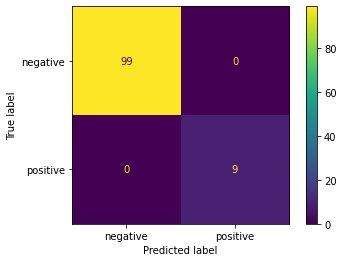

In [177]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

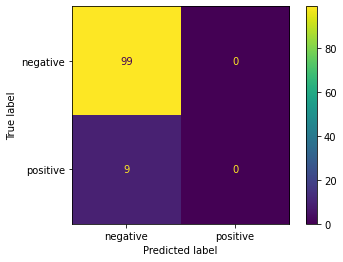

In [178]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [179]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

Precision: 0.0
Recall: 0.0
F1: 0.0


/home/landrux/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Training and evaluating a model using TF-IDF

In [180]:
model = RandomForestClassifier()

In [181]:
model.fit(X_tfidf, y_train)

RandomForestClassifier()

In [182]:
y_train_tfidf_predict = model.predict(X_tfidf)
y_test_tfidf_predict = model.predict(bow.transform(X_test))

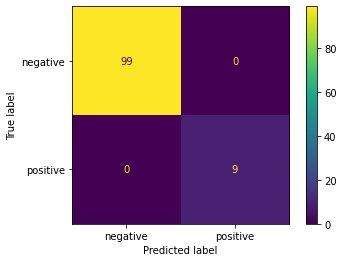

In [183]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

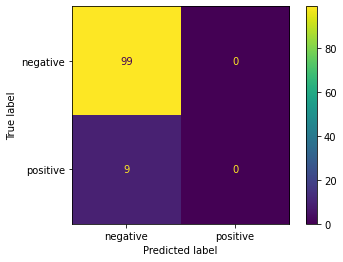

In [184]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [185]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 'positive'))

Precision: [0.91666667 0.        ]
Recall: 0.0
F1: 0.0


/home/landrux/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### How interpret the results?

### Analyzing errors

In [186]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [187]:
error_df.shape

(108, 3)

In [189]:
error_df.loc[error_df['actual'] != error_df['predicted']].head(10)

,full_text,actual,predicted
2,"El Liverpool del colombiano Luis Diáz disputará la final de la Champions League el 28 de mayo, justo un día antes de las elecciones en Colombia. https://t.co/zpfUPNuImf",positive,negative
23,Eso sabe ;)\nAdelante #PetroPresidente2022 \nhttps://t.co/xscQ26b62m https://t.co/NIJNT0Sms7,positive,negative
44,"@CoronelBillKil1 El tipo más demócrata de Colombia es Petro. No solo le robaron las elecciones de hace 4 años ,sino que el estamento no se ha encargado sino de perseguirlo con sanciones y faltas investigaciones. Todo lo ha ganado Petro",positive,negative
48,"El candidato presidencial del Pacto Histórico retomó su actividad en tarimas, a pesar de las amenazas que denunció esta semana. Cúcuta y Valledupar son las ciudades en las que reanudó su agenda.\nhttps://t.co/kDmmaQuF1v",positive,negative
75,@CARLOSFMEJIA @infopresidencia @PGN_COL @FiscaliaCol @CNE_COLOMBIA Así es.\nEs lo correcto.\nHacer bien las elecciones.\nEsa es democracia.,positive,negative
78,"@RenataSokolov A ustedes, la derecha, buscando alterar el orden público para suspender elecciones y perpetuar el régimen de terror que pretende amedrentarnos...pero Colombia dijo no más y con Petro ganaremos en primera vuelta.",positive,negative
88,Hoy amanece colombia secuestrada y sitiada por los amigos de un candidato que lleva las politicas de un expresidente durante los ultimos años y tiene a un pais en jaque!\nTenemos la posibilidad de salvar a colombia en estas elecciones 2022.\nTenemos el derecho al cambio y a la paz https://t.co/gf6MHsLrkc,positive,negative
92,"Hoy en viernes de entrevista😎 nuestro cofundador Carlos Jaramillo conversó con nosotros sobre emprendimiento, elecciones 2022 y consejos para los que quieren empezar su empresa en Colombia. Léela completa aquí 👉https://t.co/uTedwy2rSf #blog #emprendedor #emprendimiento",positive,negative
104,"No encontraron otra alternativa que llenar de miedo a Colombia, utilizan sus paramilitares para ganar elecciones. Es ahora o nunca @petrogustavo",positive,negative
